# Column Names and descriptions for King County Data Set


In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import Ridge, Lasso
R = Ridge()
L= Lasso()
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio=.9)
from sklearn.tree import ExtraTreeRegressor
ETR = ExtraTreeRegressor()
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor()

In [2]:
df = pd.read_csv('kc_house_data.csv')

# EDA

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## DATA VİSUALİZATİON

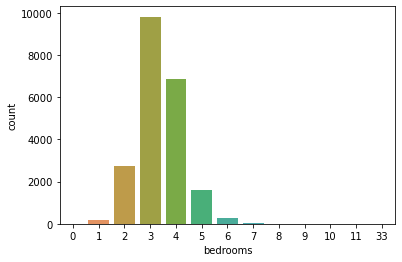

In [9]:
sns.countplot(df['bedrooms']);

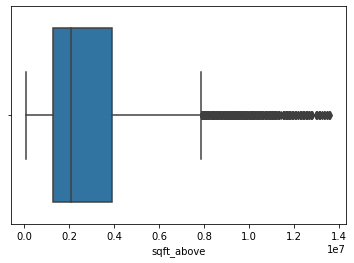

In [82]:
sns.boxplot(df['sqft_above']);

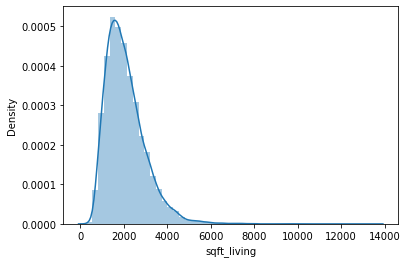

In [10]:
sns.distplot(df['sqft_living']);

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

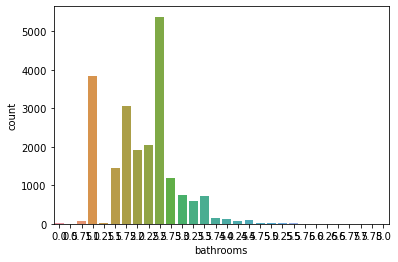

In [11]:
sns.countplot(df['bathrooms'])


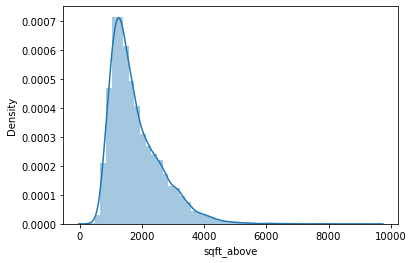

In [12]:
sns.distplot(df['sqft_above']);

# FEATURE ENGİNEERİNG

In [13]:
df.quantile(.97).astype('int')

id              -2147483648
price               1388000
bedrooms                  5
bathrooms                 3
sqft_living            4140
sqft_lot              67436
floors                    2
waterfront                0
view                      3
condition                 5
grade                    10
sqft_above             3700
sqft_basement          1340
yr_built               2013
yr_renovated           1989
zipcode               98188
lat                      47
long                   -121
sqft_living15          3560
sqft_lot15            51400
Name: 0.97, dtype: int32

In [14]:
outliers=df.quantile(.97)
df=df[(df['price']<outliers['price'])]
df=df[(df['bedrooms']<outliers['bedrooms'])]
df=df[(df['sqft_living']<outliers['sqft_living'])]

In [15]:
df['age']=2022-df['yr_built']

In [16]:
df['zipcode']=df['zipcode'].astype('category')
df['tadilat']=np.where(df['yr_renovated']>0, 1, 0)


In [17]:
df= df[df["bedrooms"] < 5]
df= df[df["condition"] < 5]
df= df[df["floors"] < 2.4]
df= df[df["bathrooms"] < 3]#7
df= df[df['view'] ==0]
df= df[df['waterfront'] ==0]
df= df[df['sqft_living']<4140]
df= df[df['sqft_living15']<3560]
df= df[df['sqft_above']<3700]

In [18]:

df['grade']=df['grade']/2
df['basement']=np.where(df['sqft_basement']>0, 1, 0)


In [19]:
df['bedrooms']=df['bedrooms']**2
df['bathrooms']=df['bathrooms']**2
df['sqft_living']=df['sqft_living']**2
df['sqft_living15']=df['sqft_living15']**2
df['sqft_above']=df['sqft_above']**2


In [20]:
x,y=df[['bedrooms','bathrooms','sqft_living','sqft_living15','sqft_above','floors','grade','tadilat','basement','view','condition','waterfront','lat','zipcode','age']],df[['price']]

In [21]:
x=pd.get_dummies(x,drop_first=True)

In [22]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_above,floors,grade,tadilat,basement,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1392400,1795600,1392400,1.0,3.5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,6604900,2856100,4708900,2.0,3.5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,592900,7398400,592900,1.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,2822400,3240000,2822400,1.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,5.0625,2941225,5008644,2941225,2.0,3.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
4,510000.0
6,257500.0


In [24]:
df.shape

(14538, 24)

In [25]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=13)

In [26]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape 

((11630, 83), (2908, 83), (11630, 1), (2908, 1))

In [27]:
regmodel = lr.fit(x_train,y_train)

In [28]:
y_pretest = regmodel.predict(x_test)
y_pretest

array([[258949.72302645],
       [393309.33088141],
       [227287.21120485],
       ...,
       [573784.91875125],
       [321119.78137486],
       [336867.18217317]])

In [29]:
(mean_squared_error(y_test, y_pretest)) ** 0.5

80175.62433067821

In [30]:
r2_score(y_test, y_pretest)

0.8138061486707721

array([[258949.72302645],
       [393309.33088141],
       [227287.21120485],
       ...,
       [573784.91875125],
       [321119.78137486],
       [336867.18217317]])

In [34]:
R.fit(x_train, y_train)
y_pred_ridge = R.predict(x_test)

In [35]:
y_pred_ridge

array([[264365.28152987],
       [391454.78604173],
       [231425.36077129],
       ...,
       [583456.81256394],
       [324837.20201488],
       [337928.41417091]])

In [36]:
(mean_squared_error(y_test, y_pred_ridge))**0.5

80252.5696820637

In [37]:
r2_score(y_test, y_pred_ridge)

0.8134485929623003

In [38]:
L.fit(x_train, y_train)
y_pred_lasso = L.predict(x_test)

In [39]:
y_pred_lasso

array([260006.50891709, 393036.82087378, 228060.78975237, ...,
       575818.06904502, 321291.86747786, 336904.04920281])

In [40]:
(mean_squared_error(y_test, y_pred_lasso))**0.5

80173.55394296757

In [41]:
r2_score(y_test,  y_pred_lasso)

0.8138157647726104

In [64]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [65]:
(mean_squared_error(y_test, y_pred_elastic))**0.5


122840.48023795507

In [66]:
r2_score(y_test, y_pred_elastic)

0.5629172715262375

In [67]:
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [68]:
(mean_squared_error(y_test, y_pred_etr))**0.5

106636.5451279677

In [69]:
r2_score(y_test, y_pred_etr)

0.6706233816167493

In [70]:
GBR.fit(x_train,y_train)
y_pred_gbr =GBR.predict(x_test)

In [71]:
(mean_squared_error(y_test, y_pred_gbr))**0.5

78801.89161321757

In [72]:
r2_score(y_test, y_pred_gbr)

0.8201319942007146

In [73]:
model=est.fit(x_train,y_train)

In [74]:
y_pred_knb = model.predict(x_test)

In [76]:
(mean_squared_error(y_test, y_pred_knb))**0.5

164477.9234411415

In [77]:
r2_score(y_test, y_pred_knb)

0.2163974098397098

In [ ]:
#model.save("arabatrahmin.h") #modelimizi kadeder
#model.load()

# Winner of the Day 

In [79]:
GBR.fit(x_train,y_train)
y_pred_gbr =GBR.predict(x_test)

In [80]:
(mean_squared_error(y_test, y_pred_gbr))**0.5

78766.13980997006

In [81]:
r2_score(y_test, y_pred_gbr)

0.8202951665983428

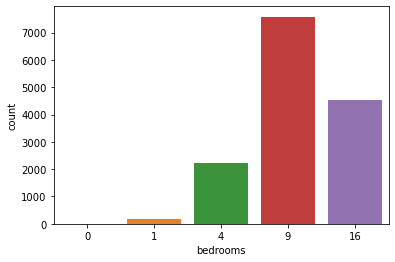

In [83]:
sns.countplot(df['bedrooms']);
